In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import src.evaluation
import src.config

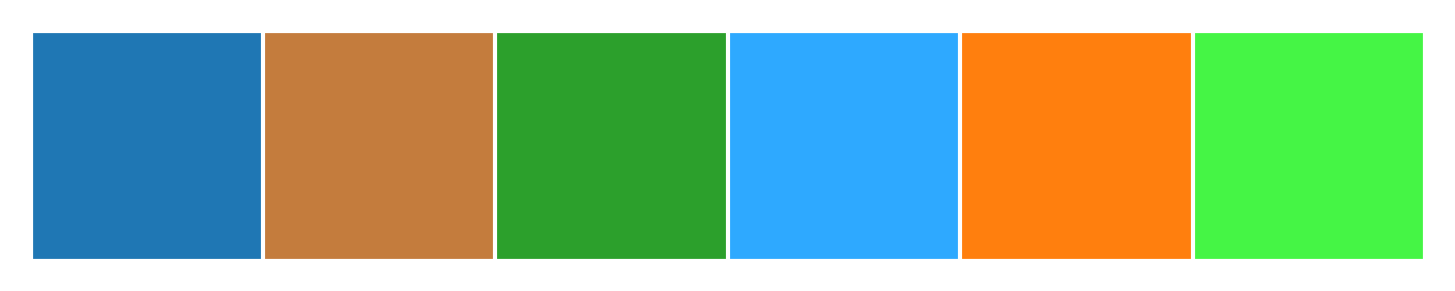

In [126]:
# base_palette = sns.color_palette("tab10", 3)
# expanded_palette = [sns.light_palette(color, n_colors=2, input="rgb").as_hex() for color in base_palette]
# expanded_palette_flat = [color for sublist in expanded_palette for color in sublist]
expanded_palette_flat = ['#1f77b4', '#c47c3d', '#2ca02c', '#2ea9ff', '#ff7f0e', '#45f545']
sns.palplot(expanded_palette_flat)

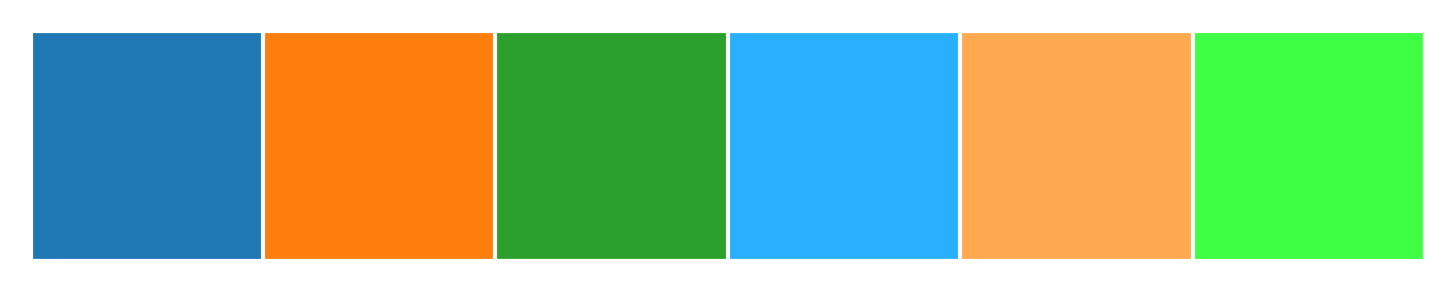

In [335]:
expanded_palette_flat = [x for x in sns.color_palette("tab20")]
expanded_palette_flat = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
    (1.0, 0.4980392156862745, 0.054901960784313725),
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
    '#28b0ff',
    '#ffa951',
    '#3eff43',
    ]
sns.palplot(expanded_palette_flat)

In [143]:
[x for x in sns.color_palette("tab20")]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [87]:
results = pd.read_parquet('./results/df_data.parquet.gzip')

In [4]:
display(results.head())
display(results.sample(5))
print(results.shape)
print(results.columns.tolist())

,Uniprot_AC,Kingdom,Type,Partition_No,Sequence,Label,Sequence_Raw,input_ids,ds_attention_mask,ds_labels,ds_type,predicted_type,predicted_label_linear_ALL,predicted_label_linear_experts,predicted_label_crf_ALL,predicted_label_crf_experts,predicted_label_linear_experts_imperfect_viterbi,predicted_label_crf_experts_imperfect,predicted_label_linear_experts_imperfect
0,P55317,EUKARYA,NO_SP,4,M L G T V K M E G H E T S D W N S Y Y A D T Q ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MLGTVKMEGHETSDWNSYYADTQEAYSSVPVSNMNSGLGSMNSMNT...,"[19, 4, 5, 11, 6, 14, 19, 9, 5, 20, 9, 11, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
1,P35583,EUKARYA,NO_SP,4,M L G A V K M E G H E P S D W S S Y Y A E P E ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSM...,"[19, 4, 5, 3, 6, 14, 19, 9, 5, 20, 9, 13, 7, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2,Q8UVD9,EUKARYA,NO_SP,4,M E I S T P D F G F G T E D S S A Q Q S A N R ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MEISTPDFGFGTEDSSAQQSANRAIPQPVPAPAFPLKETASDTGGT...,"[19, 9, 12, 7, 11, 13, 10, 15, 5, 15, 5, 11, 9...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3,Q99PF5,EUKARYA,NO_SP,4,M S D Y S T G G P P P G P P P P A G G G G G A ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MSDYSTGGPPPGPPPPAGGGGGAAGAGGGPPPGPPGAGDRGGGGPG...,"[19, 7, 10, 18, 7, 11, 5, 5, 13, 13, 13, 5, 13...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
4,Q9URU9,EUKARYA,NO_SP,4,M N F R P E Q Q Y I L E K P G I L L S F E Q L ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MNFRPEQQYILEKPGILLSFEQLRINFKHILRHLEHESHVINSTLT...,"[19, 17, 15, 8, 13, 9, 16, 16, 18, 12, 4, 9, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


,Uniprot_AC,Kingdom,Type,Partition_No,Sequence,Label,Sequence_Raw,input_ids,ds_attention_mask,ds_labels,ds_type,predicted_type,predicted_label_linear_ALL,predicted_label_linear_experts,predicted_label_crf_ALL,predicted_label_crf_experts,predicted_label_linear_experts_imperfect_viterbi,predicted_label_crf_experts_imperfect,predicted_label_linear_experts_imperfect
2908,Q9P0V8,EUKARYA,SP,4,M V M R P L W S L L L W E A L L P I T V T G A ...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,MVMRPLWSLLLWEALLPITVTGAQVLSKVGGSVLLVAARPPGFQVR...,"[19, 6, 19, 8, 13, 4, 21, 7, 4, 4, 4, 21, 9, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",1,SP,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOO...
3054,Q6UX41,EUKARYA,SP,4,M A L M L S L V L S L L K L G S G Q W Q V F G ...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,MALMLSLVLSLLKLGSGQWQVFGPDKPVQALVGEDAAFSCFLSPKT...,"[19, 3, 4, 19, 4, 7, 4, 6, 4, 7, 4, 4, 14, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",1,SP,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
19,Q6P050,EUKARYA,NO_SP,4,M W P L L T M H I T Q L N R E C L L H L F S F ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MWPLLTMHITQLNRECLLHLFSFLDKDSRKSLARTCSQLHDVFEDP...,"[19, 21, 13, 4, 4, 11, 19, 20, 12, 11, 16, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3341,Q8VWZ7,EUKARYA,NO_SP,4,M D Y L T I I L T L L F A L T L Y E A F S Y L ...,OOOOOOMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII...,MDYLTIILTLLFALTLYEAFSYLSRRTKNLPPGPSPLPFIGSLHLL...,"[19, 10, 18, 4, 11, 12, 12, 4, 11, 4, 4, 15, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0,NO_SP,IIIIIMMMMMMMMMIMIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIMMIMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIMMMMMMMMMIMIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIMMIMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIMMIMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2047,Q9H6T0,EUKARYA,NO_SP,4,M T P P P P P P P P P G P D P A A D P A A D P ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MTPPPPPPPPPGPDPAADPAADPCPWPGSLVVLFGATAGALGRDLG...,"[19, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


(4147, 19)
['Uniprot_AC', 'Kingdom', 'Type', 'Partition_No', 'Sequence', 'Label', 'Sequence_Raw', 'input_ids', 'ds_attention_mask', 'ds_labels', 'ds_type', 'predicted_type', 'predicted_label_linear_ALL', 'predicted_label_linear_experts', 'predicted_label_crf_ALL', 'predicted_label_crf_experts', 'predicted_label_linear_experts_imperfect_viterbi', 'predicted_label_crf_experts_imperfect', 'predicted_label_linear_experts_imperfect']


In [5]:
sum([len(x) for x in results['Label'].tolist()]), sum([len(x) for x in results['predicted_label_linear_ALL'].tolist()])

(289886, 289886)

In [20]:
results[results['Label'].str.contains('O')].shape

(1319, 19)

In [26]:
list(src.config.label_encoding.keys())

['I', 'L', 'M', 'O', 'S', 'T']

In [42]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [145]:
# results.iloc[3000:3001].apply(lambda x: src.evaluation.evaluate_mcc(targets=list(x['Label']), predictions=list(x['predicted_label_linear_ALL']), labels=expert_labels), axis=1)#.at[0]
# res = results.head(1000).apply(lambda x: src.evaluation.evaluate_mcc(targets=list(x['Label']), predictions=list(x['predicted_label_linear_ALL']), labels=expert_labels), axis=1)
# pd.DataFrame(res.to_dict()).T

In [146]:
# pd.DataFrame(res.to_dict()).T.S.mean()

In [308]:
expert_labels = ['S', 'L', 'T', 'O', 'I', 'M']
index_names = ['predicted_label_linear_ALL', 'predicted_label_linear_experts', 'predicted_label_linear_experts_imperfect', 'predicted_label_crf_ALL', 'predicted_label_crf_experts', 'predicted_label_crf_experts_imperfect']
real_names = ['Linear Broad', 'Linear Experts Perfect Gate', 'Linear Experts Imperfect Gate', 'CRF Broad', 'CRF Experts Perfect Gate', 'CRF Experts Imperfect Gate']

mcc_values = {}
for index_name, real_name in zip(index_names, real_names):
    # print(index_name, real_name)
    tmp_mcc_values = src.evaluation.evaluate_mcc(
        targets=list(''.join(results['Label'].tolist())),
        predictions=list(''.join(results[index_name].tolist())),
        labels=expert_labels
    )
    # tmp_mcc_values['real_names'] = real_name
    mcc_values.update({real_name: tmp_mcc_values})

In [309]:
df_mcc_values = pd.DataFrame(mcc_values).reset_index().rename(columns={'index': 'Label'}).melt(id_vars=['Label'], var_name='Model', value_name='MCC')
df_mcc_values['Error'] = df_mcc_values['MCC'].apply(lambda x: x[1])
df_mcc_values['MCC'] = df_mcc_values['MCC'].apply(lambda x: x[0])
# sns.set(style="whitegrid")
# ax = sns.barplot(data=df_mcc_values, ci=None)
# ax.set(ylim=(0.5, None))

In [310]:
df_mcc_values['Label'] = df_mcc_values['Label'].map({'S': 'Sec/SPI\nSignal (S)', 'L': 'Sec/SPII\nSignal (L)', 'T': 'Tat/SPI Signal\n(T)', 'O': 'Outer\nRegion (O)', 'I': 'Inner Region (I)', 'M': 'Membrane\nRegion (M)'})


In [311]:
df_mcc_values.head()

,Label,Model,MCC,Error
0,Sec/SPI\nSignal (S),Linear Broad,0.928827,0
1,Sec/SPII\nSignal (L),Linear Broad,0.955939,0
2,Tat/SPI Signal\n(T),Linear Broad,0.945846,0
3,Outer\nRegion (O),Linear Broad,0.937839,0
4,Inner Region (I),Linear Broad,0.931798,0


In [312]:
# _errors = pd.DataFrame(df_mcc_values.groupby('Model')['MCC'].std()/np.sqrt(36)).to_dict()['MCC']
# df_mcc_values['Error'] = 
_errors = {
    'CRF Broad': 0.01324,
    'CRF Experts Imperfect Gate': 0.005334,
    'CRF Experts Perfect Gate': 0.0043,
    'Linear Broad': 0.00823,
    'Linear Experts Imperfect Gate': 0.007324,
    'Linear Experts Perfect Gate': 0.00830}
df_mcc_values['Error'] = df_mcc_values.apply(lambda row: _errors[row['Model']], axis=1)

In [313]:
# df_mcc_values

<Axes: title={'center': 'MCC Scores for Different Models'}, xlabel='Label', ylabel='MCC'>

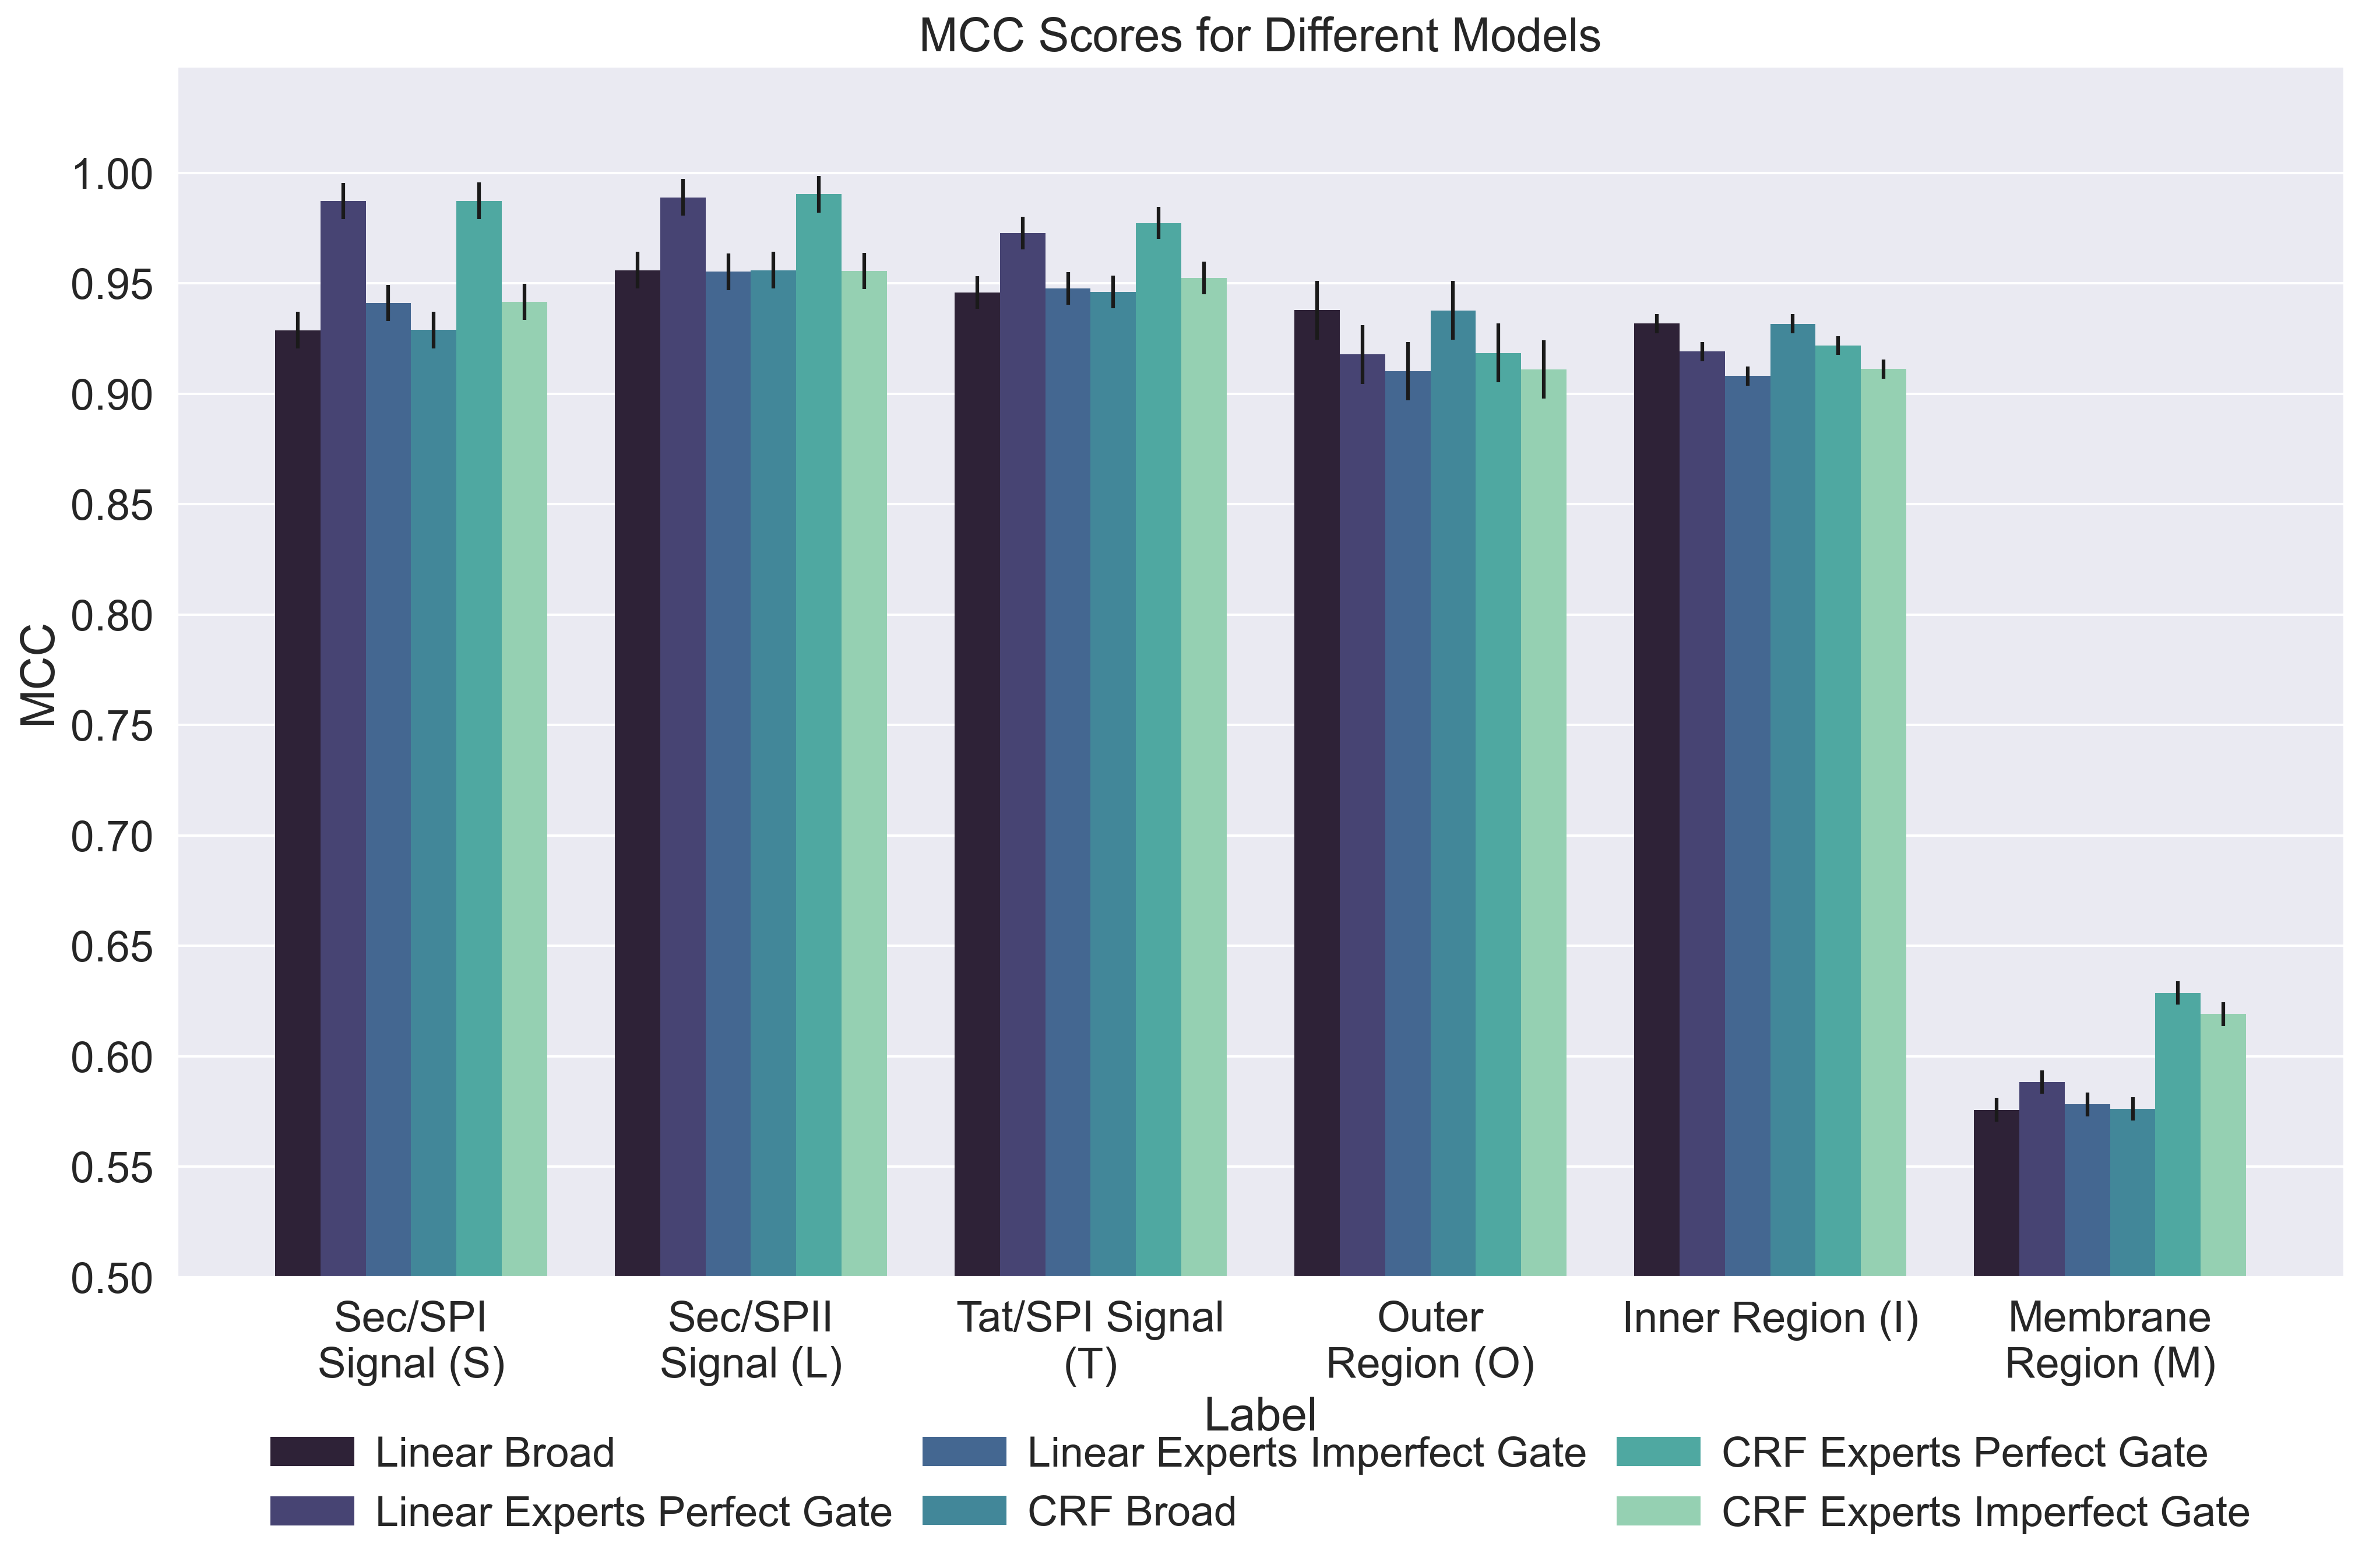

In [349]:
src.evaluation.plot_mcc_split_label(df_mcc_values, 'mako')

In [9]:
expert_labels = ['S', 'L', 'T', 'O', 'I', 'M']
index_names = ['predicted_label_linear_ALL', 'predicted_label_linear_experts', 'predicted_label_linear_experts_imperfect', 'predicted_label_crf_ALL', 'predicted_label_crf_experts', 'predicted_label_crf_experts_imperfect']
real_names = ['Linear Broad', 'Linear Experts Perfect Gate', 'Linear Experts Imperfect Gate', 'CRF Broad', 'CRF Experts Perfect Gate', 'CRF Experts Imperfect Gate']
sp_translations = {'S': 'Sec/SPI Signal (S)', 'L': 'Sec/SPII Signal (L)', 'T': 'Tat/SPI Signal (T)', 'O': 'Outer\nRegion (O)', 'I': 'Inner Region (I)', 'M': 'Membrane\nRegion (M)'}

mcc_values = {}
for index_name, real_name in zip(index_names, real_names):
    # print(index_name, real_name)
    mcc_kingdom_split = {}
    for kindom in results['Kingdom'].unique():
        tmp_mcc_values = src.evaluation.evaluate_mcc(
            targets=list(''.join(results[results['Kingdom'] == kindom]['Label'].tolist())),
            predictions=list(''.join(results[results['Kingdom'] == kindom][index_name].tolist())),
            labels=expert_labels
        )
        # tmp_mcc_values['real_names'] = real_name
        mcc_kingdom_split.update({kindom: tmp_mcc_values})
    mcc_values.update({index_name: mcc_kingdom_split})

In [57]:
res = []
for _model in index_names:
    melted_model_df = pd.DataFrame(mcc_values[_model]).reset_index().melt(id_vars=['index'], var_name='Category', value_name='Value').rename(columns={'index': 'Type', 'Value': 'MCC', 'Category': 'Kingdom'})
    melted_model_df['Error'] = melted_model_df['MCC'].apply(lambda x: x[1])
    melted_model_df['MCC'] = melted_model_df['MCC'].apply(lambda x: x[0])
    melted_model_df['Kingdom'] = melted_model_df['Kingdom'].apply(lambda x: x.capitalize())
    melted_model_df = melted_model_df[melted_model_df['MCC'] != 0]
    melted_model_df['Model'] = _model
    melted_model_df['Simple_Type'] = melted_model_df['Type']
    melted_model_df['Type'] = melted_model_df['Type'].map(sp_translations)
    melted_model_df['Model'] = melted_model_df['Model'].map(dict(zip(index_names, real_names)))
    melted_model_df
    res.append(melted_model_df)
melted_df = pd.concat(res, axis=0)

In [58]:
melted_df['Kingdom'].unique()

array(['Eukarya', 'Archaea', 'Positive', 'Negative'], dtype=object)

In [166]:
_kindom = 'Eukarya'
melted_df[melted_df['Kingdom'] == _kindom]

,Type,Kingdom,MCC,Error,Model,Simple_Type
0,Sec/SPI Signal (S),Eukarya,0.938654,0,Linear Broad,S
3,Outer\nRegion (O),Eukarya,0.932980,0,Linear Broad,O
4,Inner Region (I),Eukarya,0.919055,0,Linear Broad,I
5,Membrane\nRegion (M),Eukarya,0.599022,0,Linear Broad,M
0,Sec/SPI Signal (S),Eukarya,0.989039,0,Linear Experts Perfect Gate,S
3,Outer\nRegion (O),Eukarya,0.906839,0,Linear Experts Perfect Gate,O
4,Inner Region (I),Eukarya,0.901171,0,Linear Experts Perfect Gate,I
5,Membrane\nRegion (M),Eukarya,0.626726,0,Linear Experts Perfect Gate,M
0,Sec/SPI Signal (S),Eukarya,0.953122,0,Linear Experts Imperfect Gate,S
3,Outer\nRegion (O),Eukarya,0.896454,0,Linear Experts Imperfect Gate,O


In [189]:
# errors_euk = melted_df['MCC'].tolist()

In [446]:
np.std([1,1,1,1,1,1,1]) 

0.0

In [447]:
euk_errors = [0.008843030020910053, 0.00833780700401309, 0.007915217874895991, 0.007316060848095336, 0.009115621915477509, 0.008565877086419958, 0.008689663225525779, 0.007079087855268991, 0.007252493839335378, 0.008858319950672334, 0.007091171023075689, 0.006762150982145675, 0.0126766244754739, 0.011210841833259048, 0.01106541252924351, 0.011279948870277412, 0.012707538771774397, 0.012471136632013272, 0.010360234361080054, 0.01072674961623544, 0.011039117982897168, 0.010161784816472558, 0.012885086757797334, 0.011990696776234289]
arch_errors = [0.0570257749629035, 0.05318576654181419, 0.058655320808664105, 0.05040295880144623, 0.05206111440133385, 0.04468544163653696, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03880812077908939, 0.038795478031595824, 0.04044745004017241, 0.035586916273101316, 0.033628655235951294, 0.03713248856734938, 0.04672237790843924, 0.05306653023420957, 0.0468810202018848, 0.04672756930889681, 0.048639391891150525, 0.0558012620868559, 0.06182629446191362, 0.053450331810326226, 0.05168790503191697, 0.0461437602747725, 0.0469880989060047, 0.057777125800605095, 0.0315797786967633, 0.03463063818632054, 0.032645192378800245, 0.03599003010818213, 0.03908640064739608, 0.03733106280105193]
pos_errors = [0.014958855027037627, 0.016067467971970072, 0.014849292746488017, 0.01695309332213373, 0.015909081589966453, 0.016878190941892177, 0.018196917543079432, 0.019435384876713077, 0.019886977830259337, 0.02131185432994776, 0.021351606816305782, 0.02100927056658151, 0.02319138343910088, 0.022494469809664727, 0.022639048883610062, 0.020901924315945137, 0.021976930611578648, 0.02343826076051575, 0.014572778894672116, 0.015307861947454912, 0.014377802398644298, 0.01480855217635864, 0.014277977093943454, 0.015705847670803713, 0.02520173029719405, 0.023344431434653323, 0.02487655545584469, 0.02496520999738448, 0.022522177356044403, 0.024583532997250235, 0.01669860001117556, 0.014853122910878558, 0.0148635910230332, 0.014668706280056145, 0.015666130244625036, 0.015392455640762606]
neg_errors = [0.016661646056817914, 0.016766958815341952, 0.01574055772553145, 0.014946210472860141, 0.014553584484344436, 0.01665738632577527, 0.016682474194872433, 0.014566882671536231, 0.014731098850789532, 0.01635270767567701, 0.015104564132538517, 0.016476313900138647, 0.014278107041724929, 0.012618984509040471, 0.012242532674407829, 0.012622113923952086, 0.014534694455459045, 0.012957222545289384, 0.014925164883714216, 0.015241106839876083, 0.014232306609487646, 0.013511709071622212, 0.013650596172248704, 0.013437776980133879, 0.01648252753581916, 0.016222883342884787, 0.015680820215758874, 0.01658064992116396, 0.01725076012000547, 0.01570161160260351, 0.017182183509981352, 0.016985630736950797, 0.017035950499616766, 0.01725996860636593, 0.014987814841773453, 0.01688088348741055]

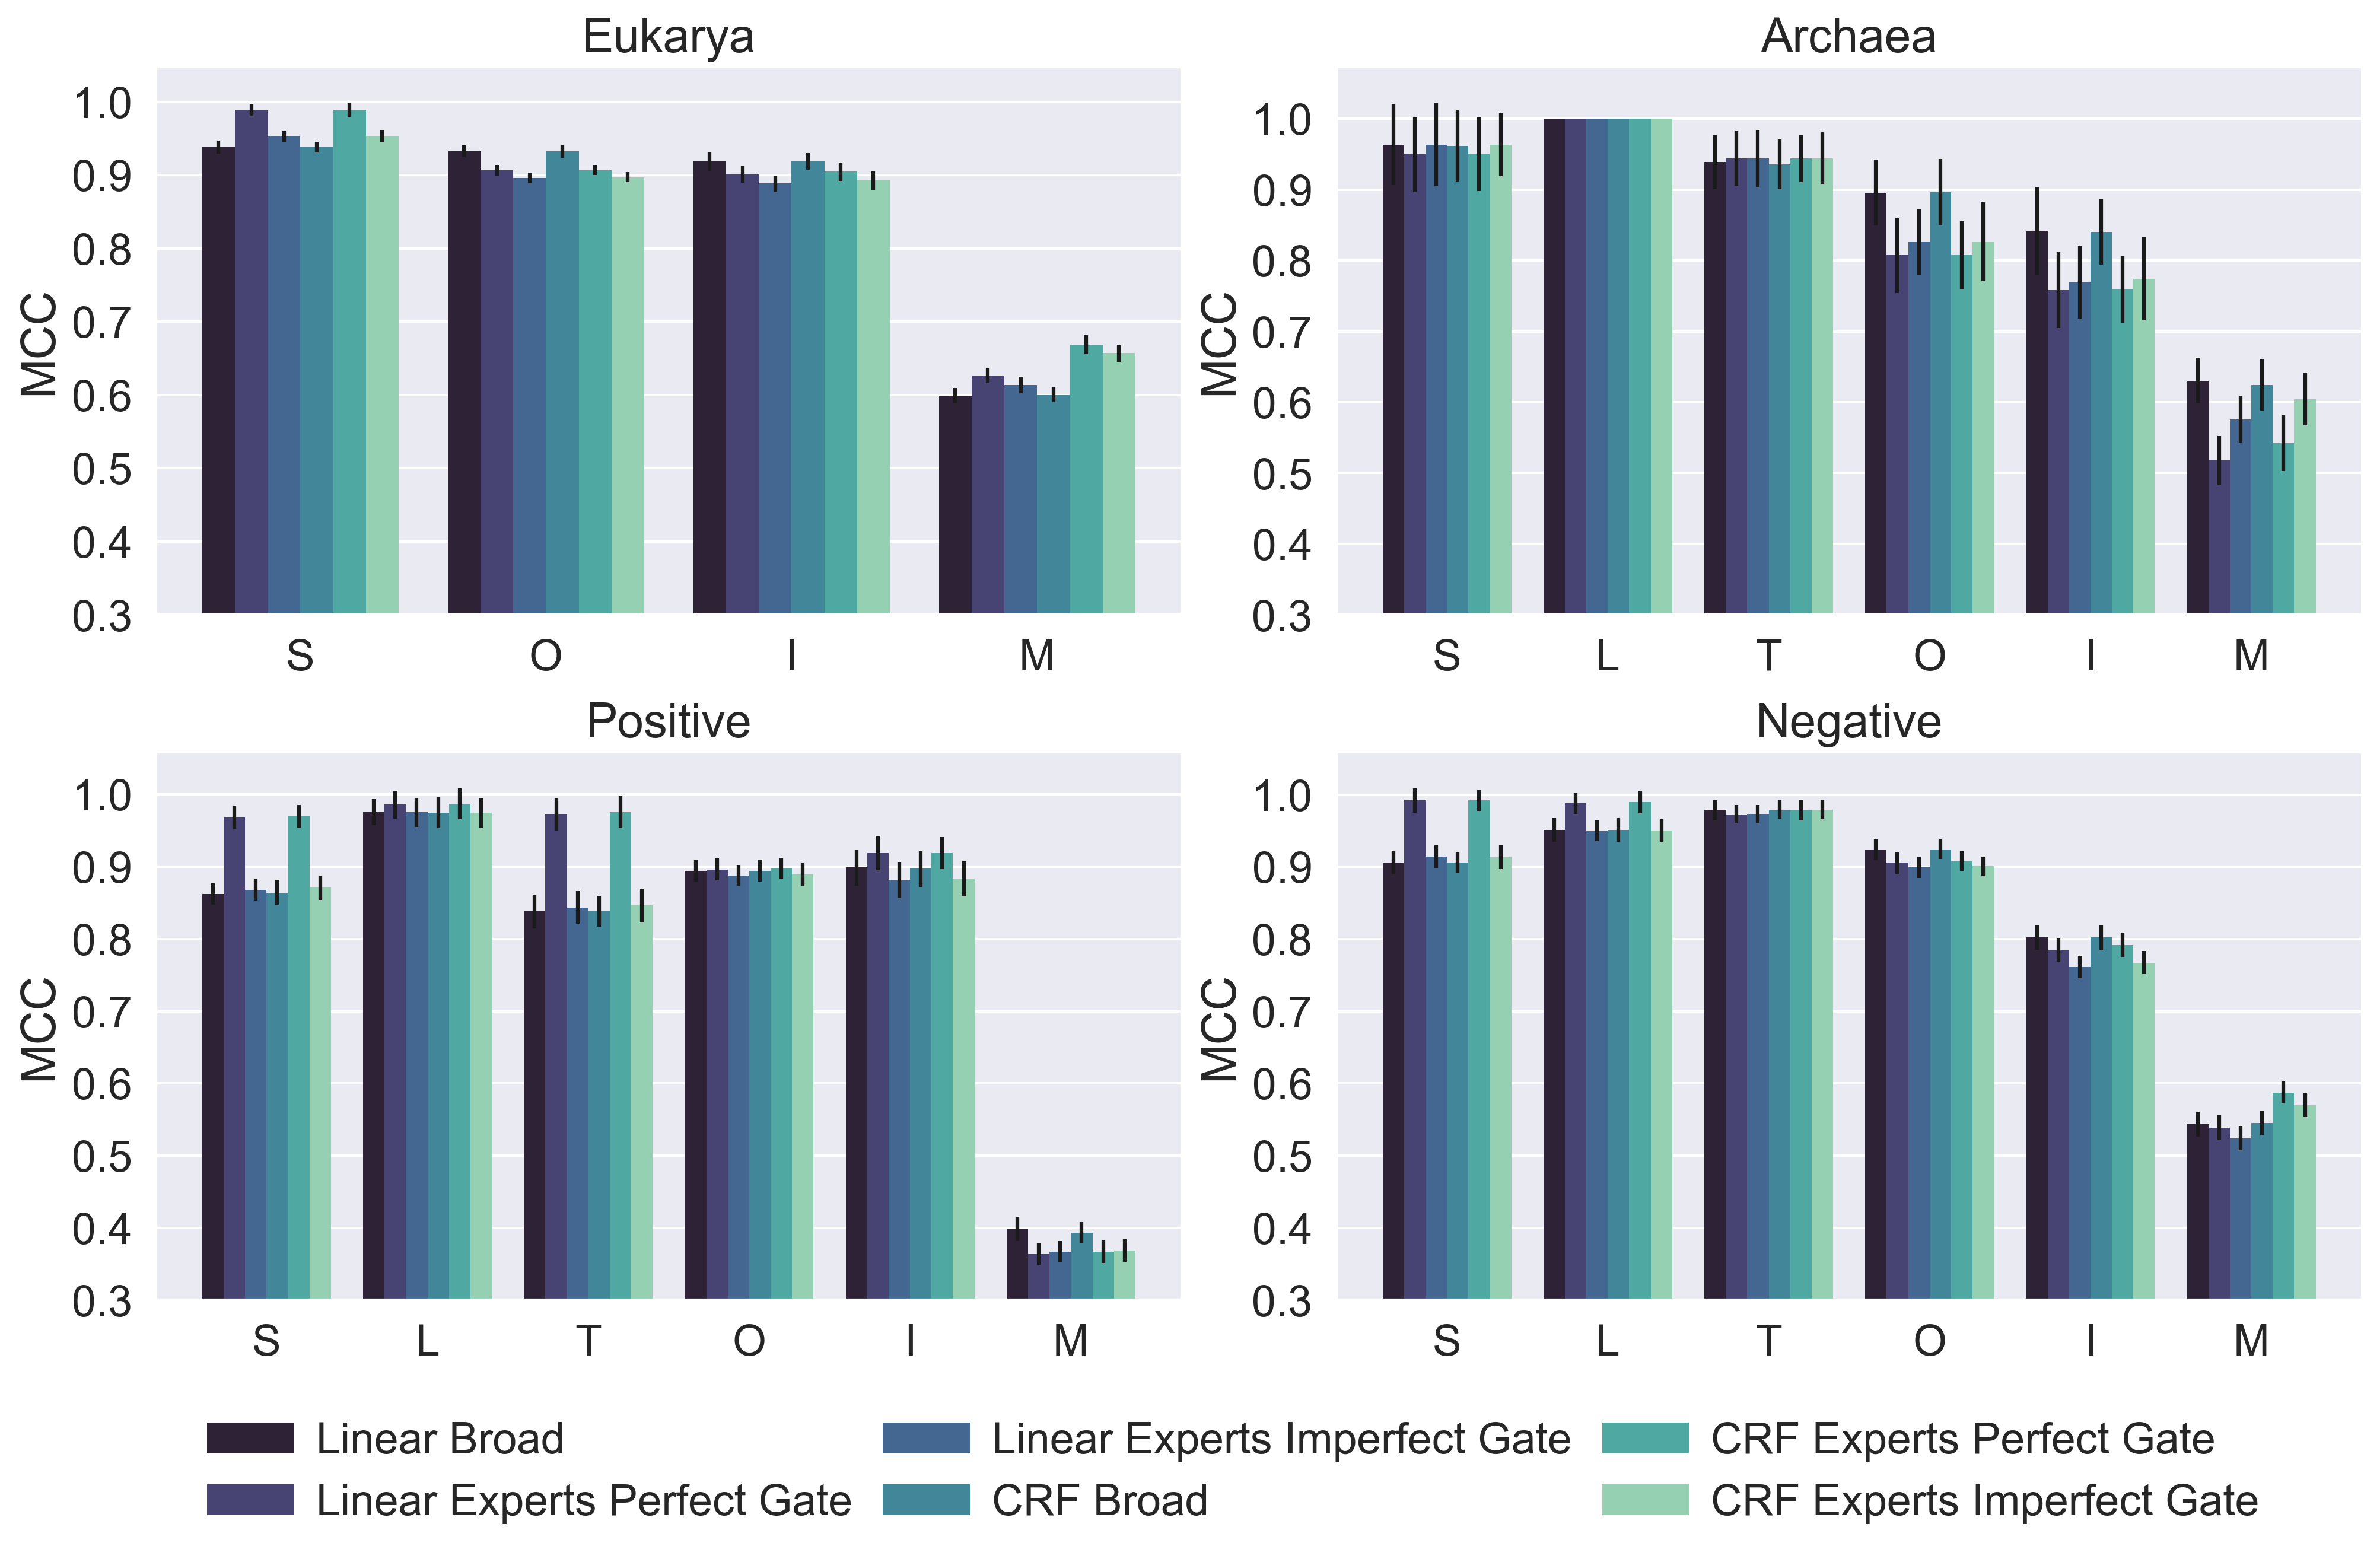

In [448]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set_palette(expanded_palette_flat)
# _palette = expanded_palette_flat
_palette = 'mako'
src.evaluation.plot_mcc_split_label_kingdom_facet_simple(melted_df[melted_df['Kingdom'] == 'Eukarya'], Title='Eukarya', ax=axs[0][0], palette=_palette, errors=euk_errors)
src.evaluation.plot_mcc_split_label_kingdom_facet_simple(melted_df[melted_df['Kingdom'] == 'Archaea'], Title='Archaea', ax=axs[0][1], palette=_palette, errors=arch_errors)
src.evaluation.plot_mcc_split_label_kingdom_facet_simple(melted_df[melted_df['Kingdom'] == 'Positive'], Title='Positive', ax=axs[1][0], palette=_palette, errors=pos_errors)
src.evaluation.plot_mcc_split_label_kingdom_facet_simple(melted_df[melted_df['Kingdom'] == 'Negative'], Title='Negative', ax=axs[1][1], palette=_palette, errors=neg_errors)

# fig.suptitle("Scores for Different Models", fontsize=25)
plt.subplots_adjust(wspace=0.15, hspace=0.25)
sns.set(font_scale=1.6)

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15), frameon=False, ncol=3, columnspacing=0.7, handletextpad=0.5)


<Axes: title={'center': 'Eukarya - Scores for Different Models'}, xlabel='Type', ylabel='MCC'>

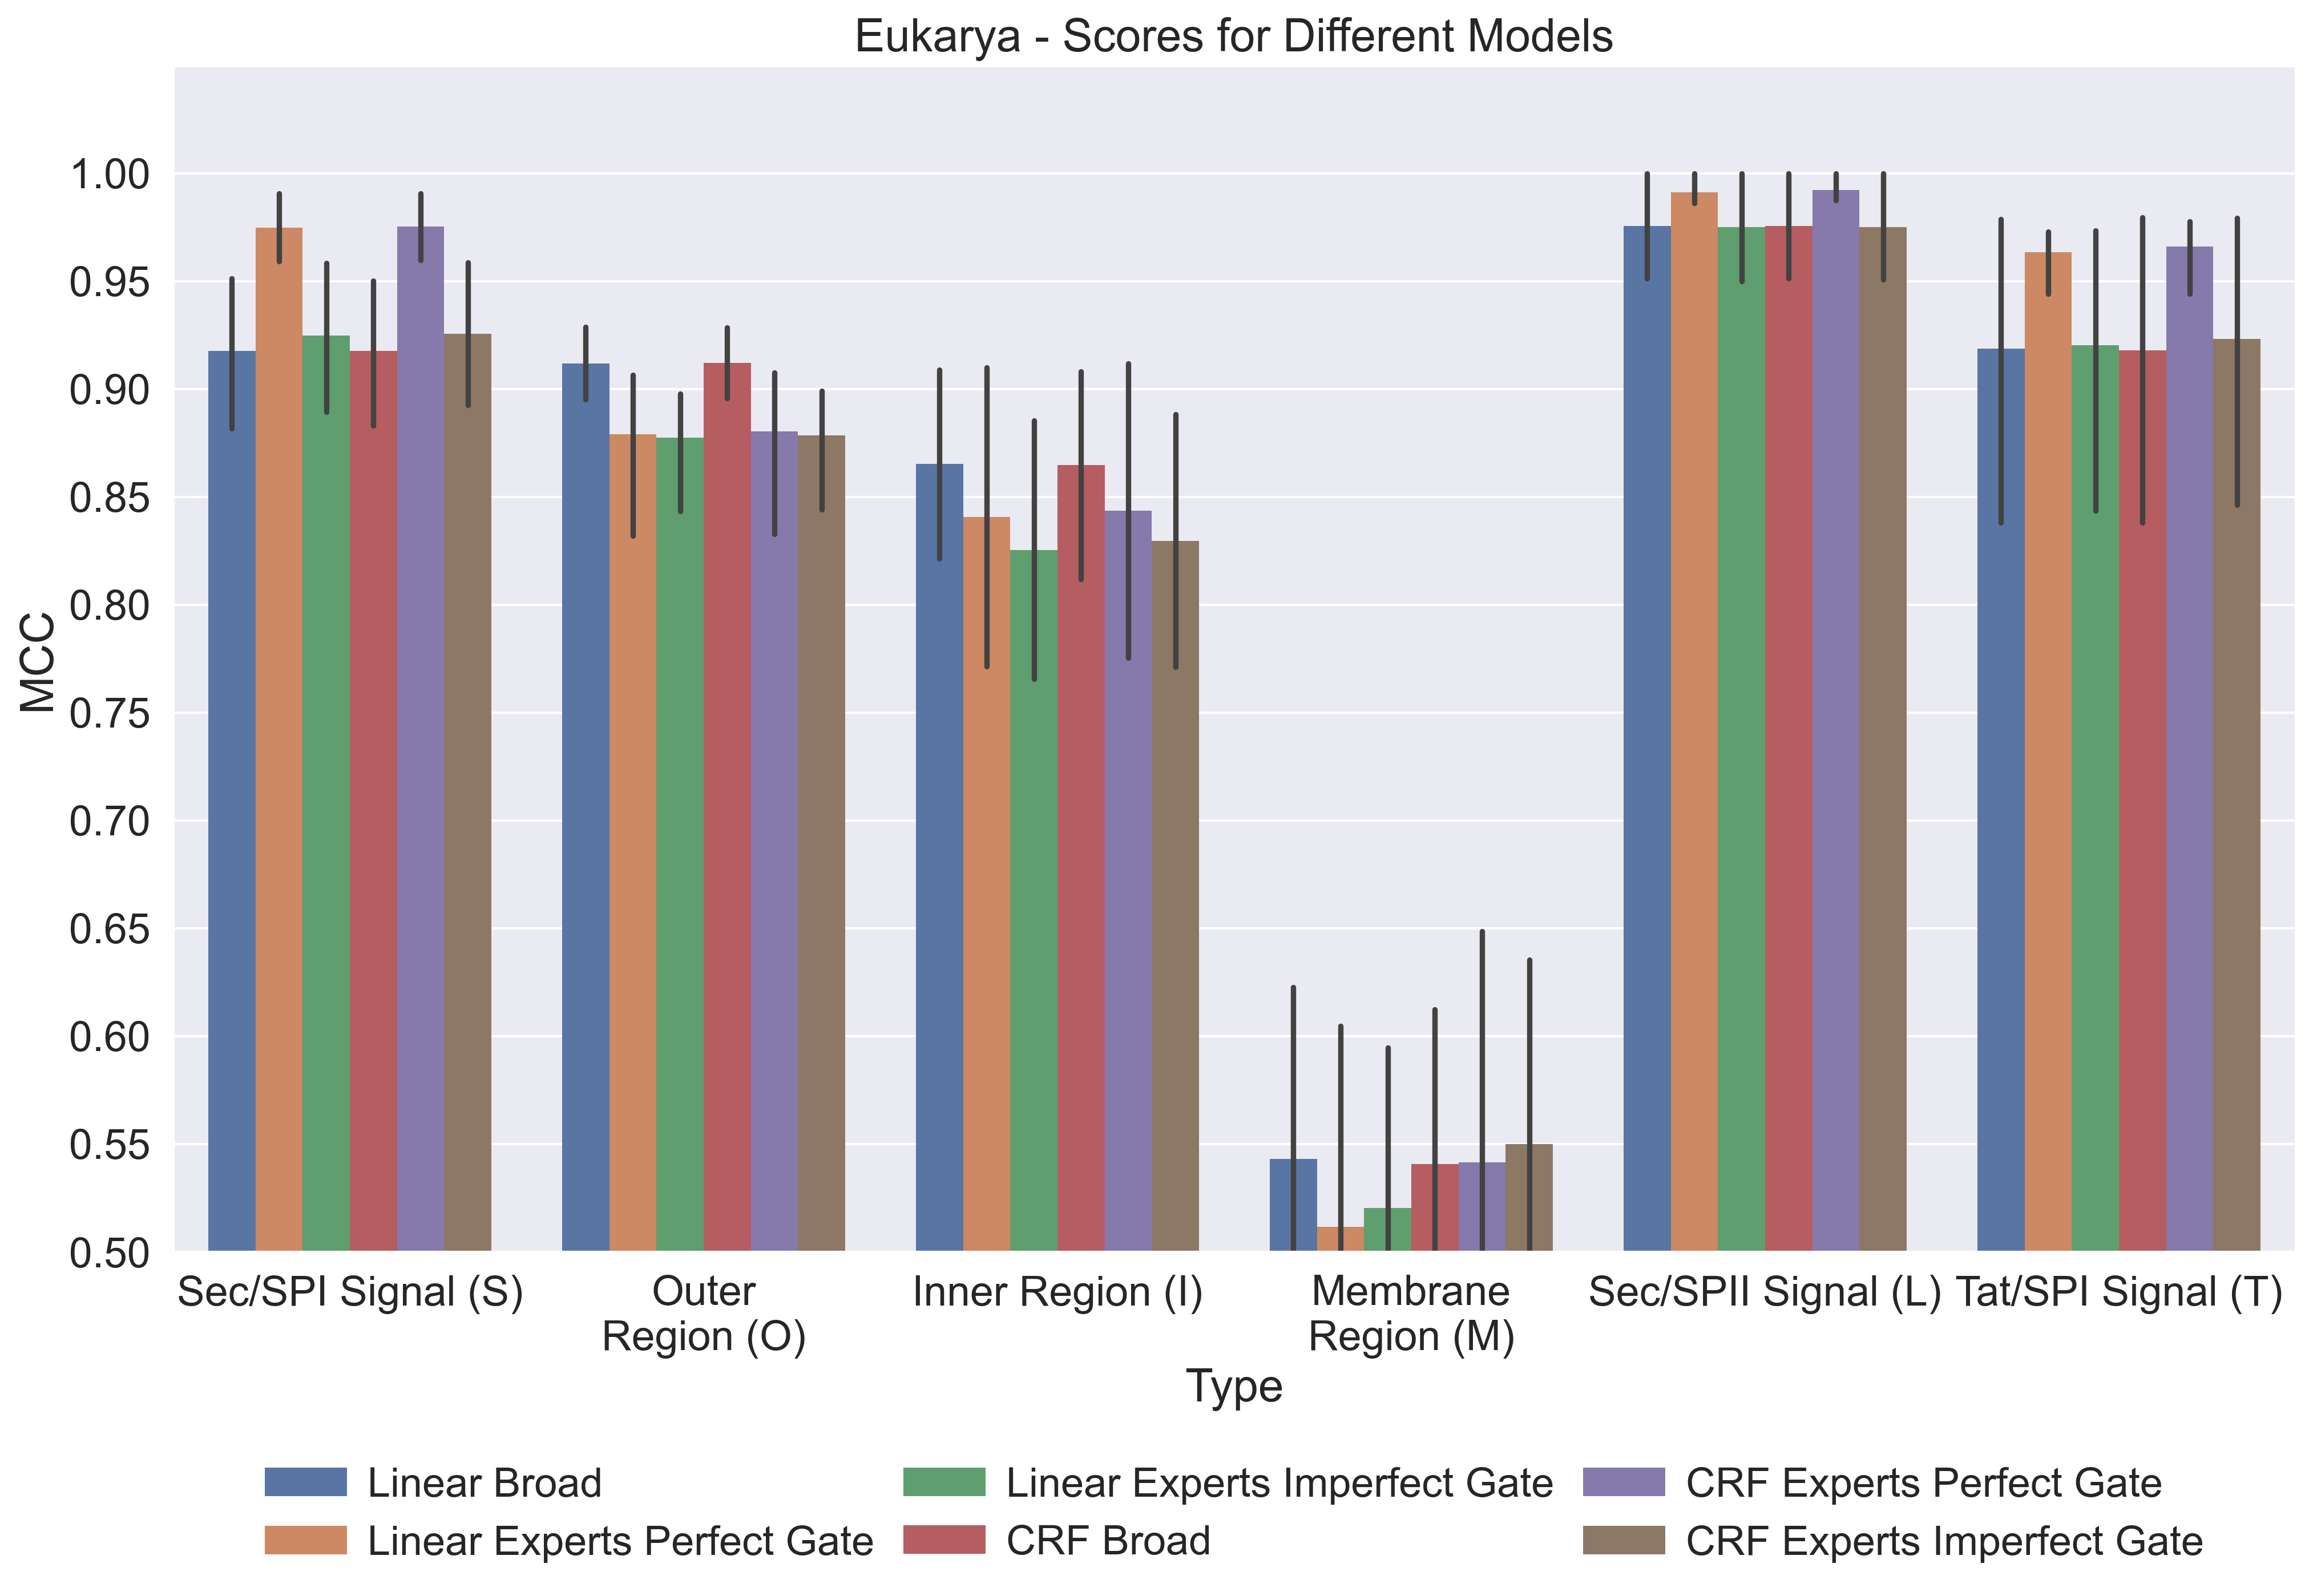

In [200]:
src.evaluation.plot_mcc_split_label_kingdom_facet(
    melted_df,
    Title=f'{_kindom} - Scores for Different Models'
    )

In [27]:
# for i, x in enumerate(melted_df['Kingdom'].unique()):
#     axs[i] = src.evaluation.plot_mcc_split_label_kingdom_facet(melted_df[melted_df['Kingdom'] == x], Title=f'{_kindom} - Scores for Different Models')

In [463]:
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        'display.max_colwidth', 100
#                        ):
#     display(melted_df)

In [416]:
# df_mcc_values = pd.DataFrame(mcc_values).reset_index().rename(columns={'index': 'Label'}).melt(id_vars=['Label'], var_name='Model', value_name='MCC')
# df_mcc_values

In [309]:
current = 'predicted_label_linear_experts_imperfect'
# current = 'Label'

# target = list(''.join(results['Label'].tolist()))
# prediction = list(''.join(results[current].tolist()))

# target = list(results['Label'].at[1])
# prediction = list(results[current].at[1])

# print(len(target), len(prediction))
# print(target)
# print(prediction)

# expert_labels = list(src.config.label_encoding.keys())
# expert_labels = list(['S', 'L', 'T' 'O', 'I', 'M'])
expert_labels = ['S', 'L', 'T', 'O', 'I', 'M']
# print(expert_labels)

evaluation_1 = src.evaluation.evaluate_mcc(
    targets=target,
    predictions=prediction,
    labels=expert_labels,
)

# evaluation_2 = src.evaluation.evaluate(
#     targets = target,
#     predictions = prediction,
#     labels = expert_labels,
# )

# print(evaluation_1)
print(*evaluation_1.items(), sep='\n')
# display(src.evaluation.plot_confusion_matrix(evaluation_1['CM'], expert_labels, title=f"Confusion Matrix for {current}"))

('S', 1.0)
('L', 1.0)
('T', 1.0)
('O', 1.0)
('I', 1.0)
('M', 1.0)


<Axes: title={'center': 'Confusion Matrix for Linear Experts Imperfect Gate'}, xlabel='Predicted', ylabel='Actual'>

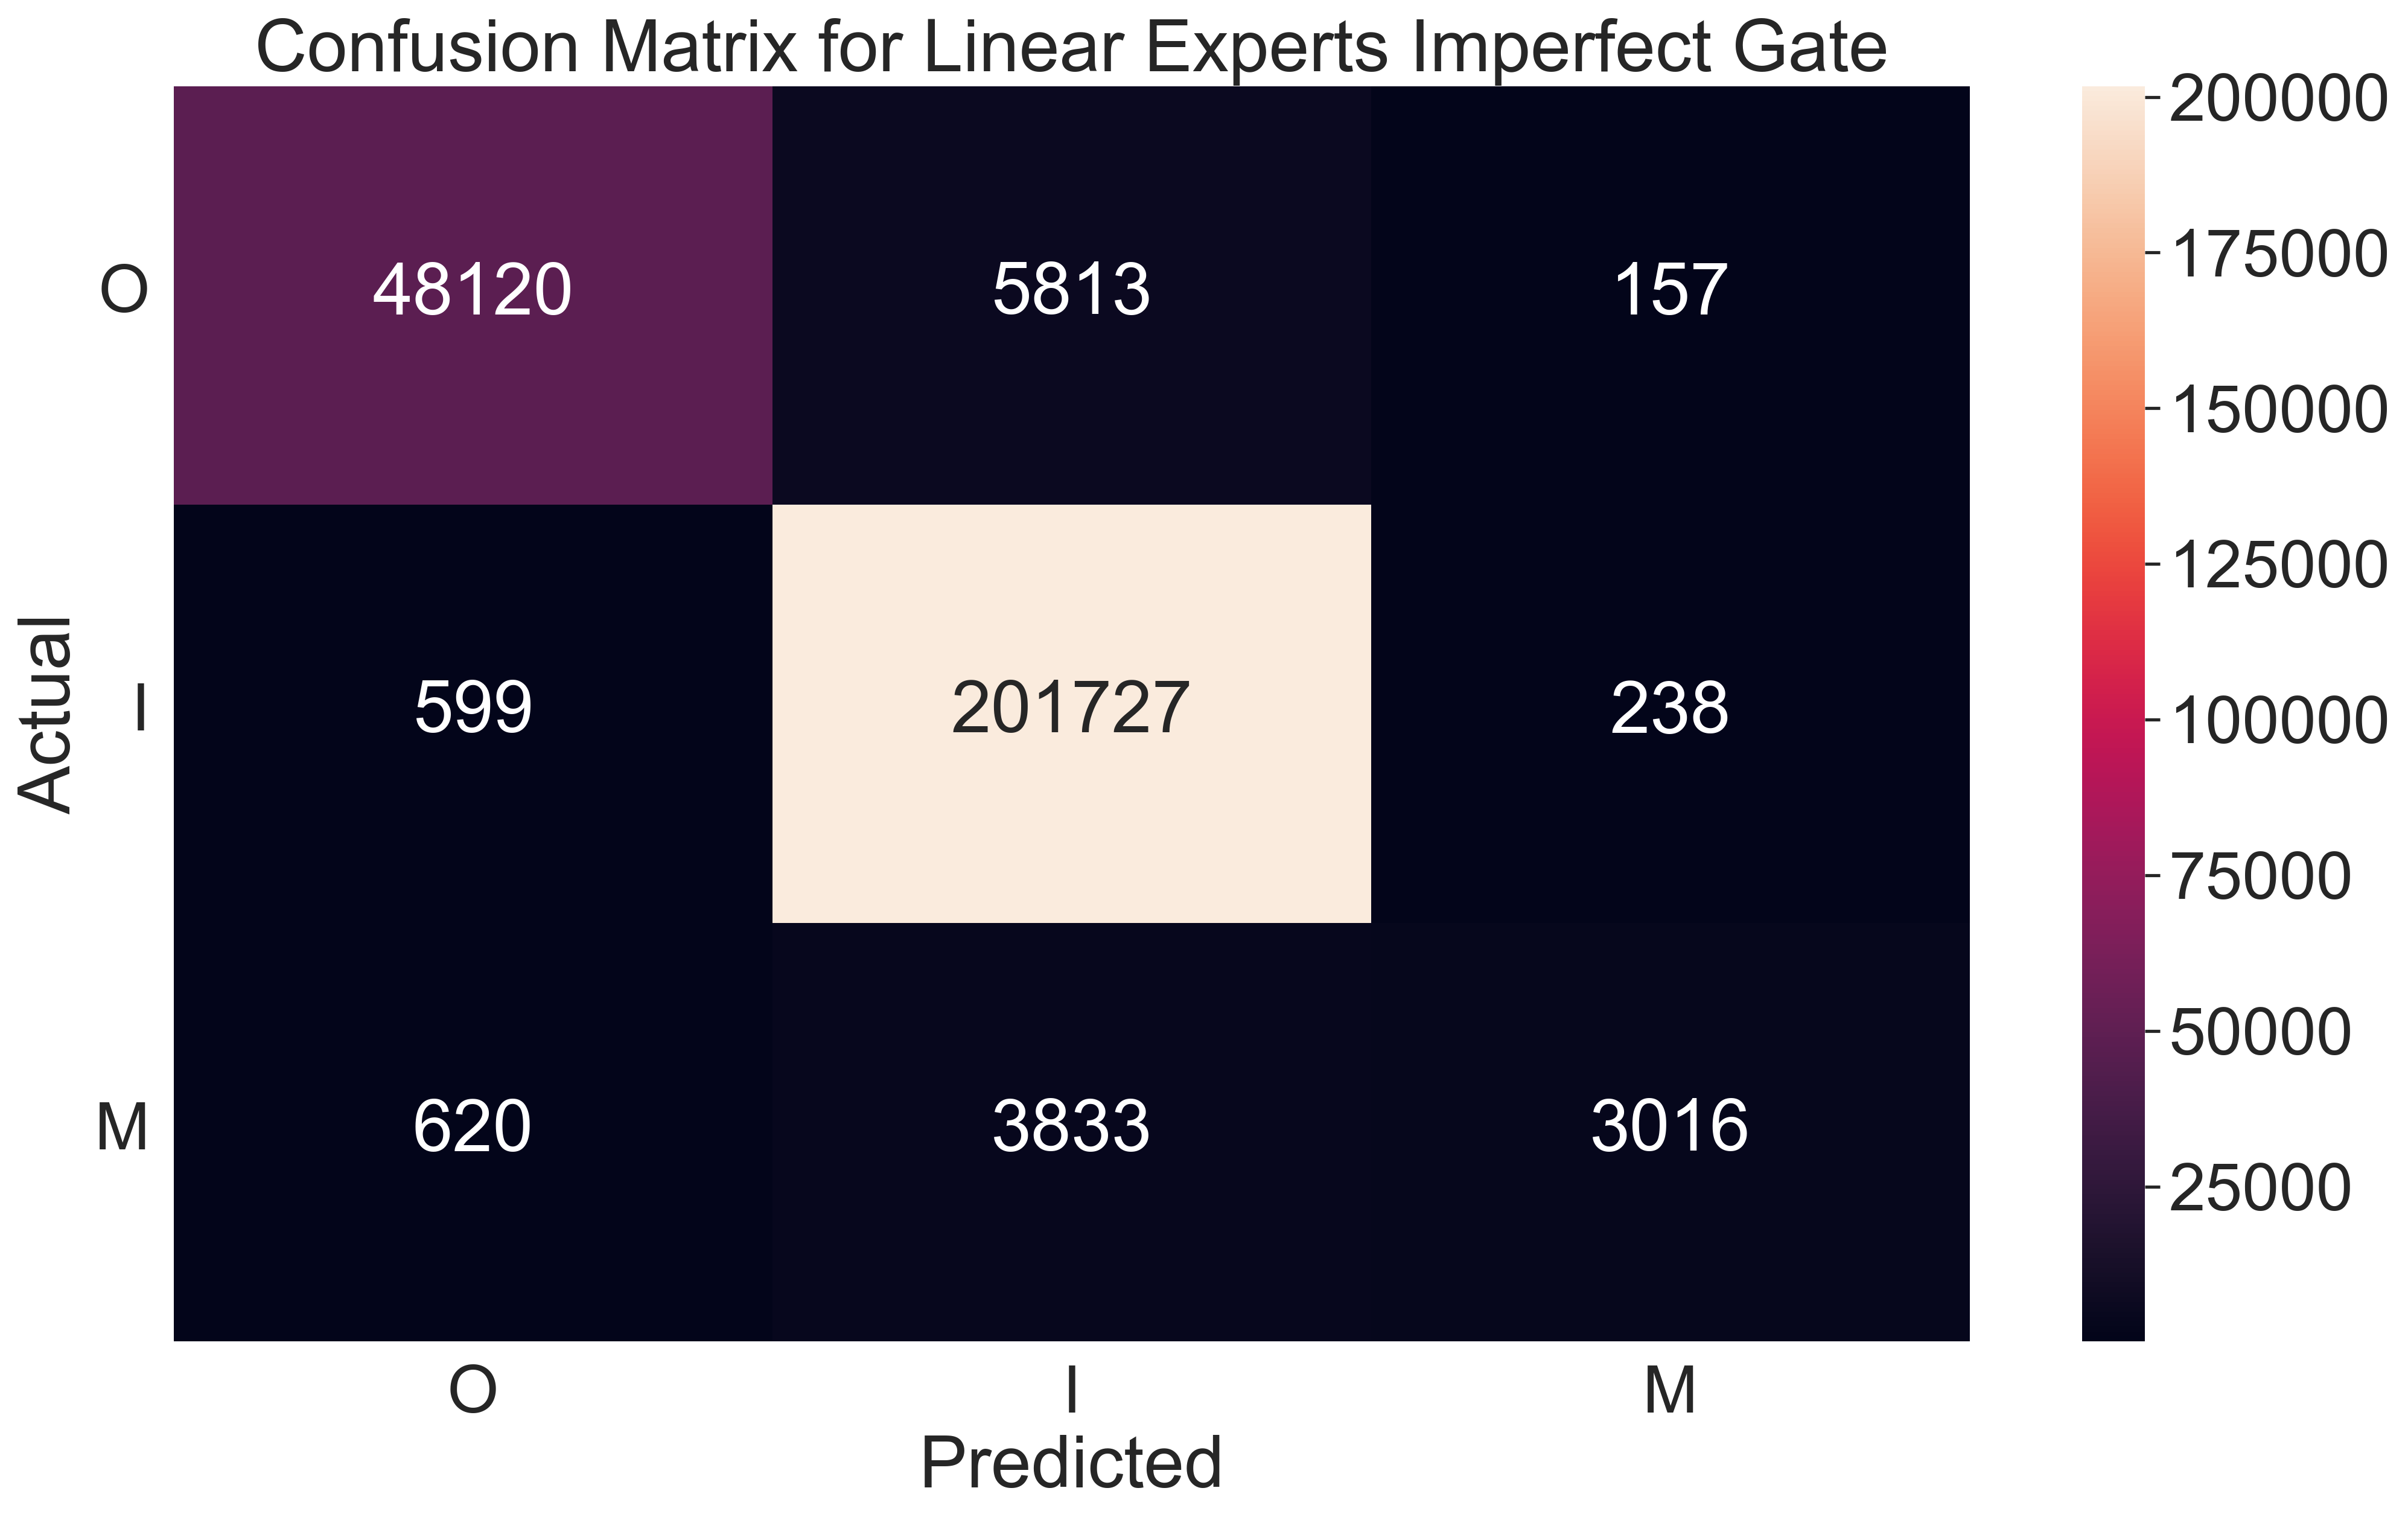

In [351]:
current = 'predicted_label_linear_experts_imperfect'
target = list(''.join(results['Label'].tolist()))
prediction = list(''.join(results[current].tolist()))

expert_labels = ['S', 'L', 'T', 'O', 'I', 'M']
evaluation_1 = src.evaluation.evaluate(
    targets=target,
    predictions=prediction,
    labels=expert_labels,
)
lower_right_3x3 = evaluation_1['CM'][-3:, -3:]
display(src.evaluation.plot_confusion_matrix(lower_right_3x3, labels=expert_labels[-3:], title=f"Confusion Matrix for Linear Experts Imperfect Gate"))

<Axes: title={'center': 'Confusion Matrix for Linear Experts Perfect Gate'}, xlabel='Predicted', ylabel='Actual'>

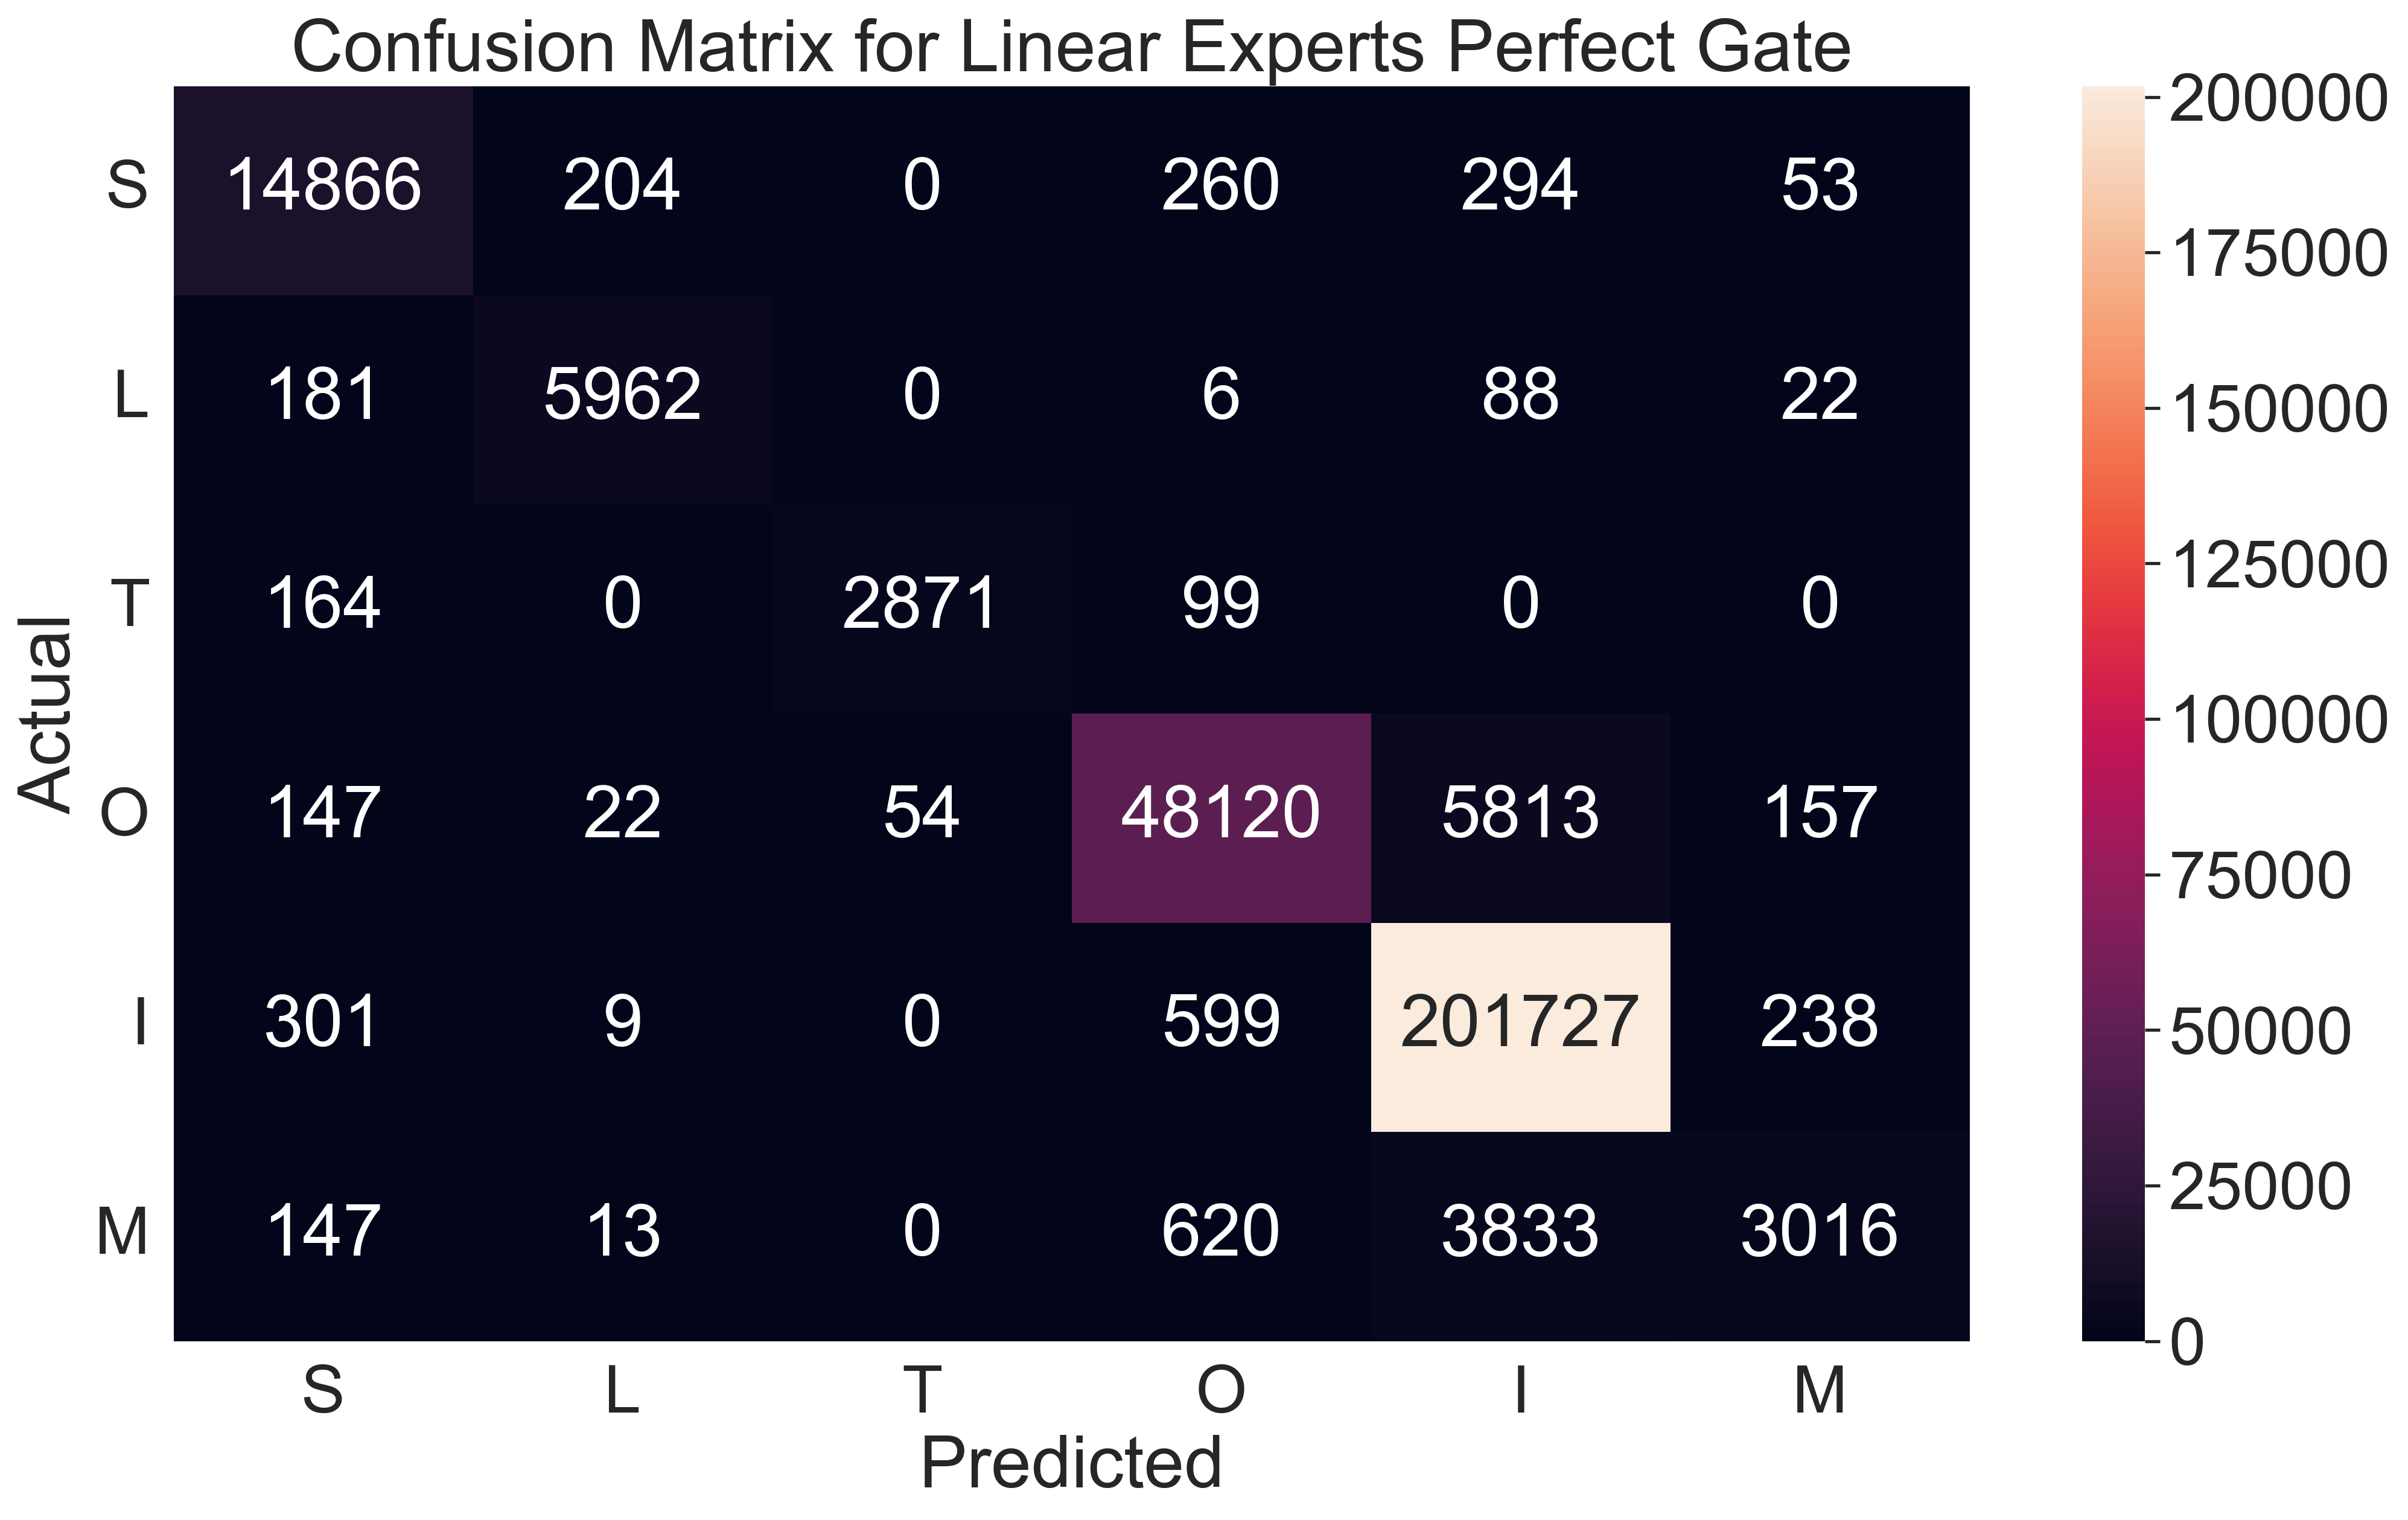

In [352]:
display(src.evaluation.plot_confusion_matrix(evaluation_1['CM'], labels=expert_labels, title=f"Confusion Matrix for Linear Experts Perfect Gate"))

---

In [21]:
gate_labels = ['NO_SP', 'SP', 'LIPO', 'TAT']

metrics_gate = src.evaluation.evaluate(
    targets=results['Type'],
    predictions=results['predicted_type'],
    labels=gate_labels
)
print(metrics_gate)
print(metrics_gate['TPR'].mean())
# display(src.evaluation.plot_confusion_matrix(metrics_gate['CM'], gate_labels))

{'CM': array([[3064,   17,    1,    0],
       [  12,  652,   12,    0],
       [   5,   11,  282,    0],
       [   0,    5,    0,   86]]), 'ACC': array([0.99156016, 0.98625512, 0.99300699, 0.99879431]), 'TP': array([3064,  652,  282,   86]), 'TN': array([1048, 3438, 3836, 4056]), 'FP': array([17, 33, 13,  0]), 'FN': array([18, 24, 16,  5]), 'TPR': array([0.99415964, 0.96449704, 0.94630872, 0.94505495]), 'TNR': array([0.98403756, 0.99049265, 0.9966225 , 1.        ]), 'PPV': array([0.99448231, 0.95182482, 0.9559322 , 1.        ]), 'FPR': array([0.01596244, 0.00950735, 0.0033775 , 0.        ]), 'FNR': array([0.00584036, 0.03550296, 0.05369128, 0.05494505]), 'NPV': array([0.98311445, 0.99306759, 0.99584631, 0.99876878]), 'FDR': array([0.00551769, 0.04817518, 0.0440678 , 0.        ]), 'F1': array([0.99432095, 0.95811903, 0.95109612, 0.97175141]), 'MCC_1': 0.9634329174725134, 'MCC_2': array([0.97789693, 0.94992764, 0.94734454, 0.97154072]), 'MCC_3': array([0.97789693, 0.94992764, 0.9473445

['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1.  1. nan nan]
['SP', 'LIPO', 'NO_SP', 'NO_SP', 'NO_SP']
['SP', 'LIPO', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1.  1.  1. nan]
['NO_SP', 'NO_SP', 'LIPO', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'LIPO', 'NO_SP', 'NO_SP']
[ 1. nan  1. nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['LIPO', 'NO_SP', 'LIPO', 'NO_SP', 'SP']
['LIPO', 'NO_SP', 'LIPO', 'NO_SP', 'SP']
[ 1.  1.  1. nan]
['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1.  1. nan nan]
['SP', 'SP', 'NO_SP', 'NO_SP', 'SP']
['SP', 'SP', 'NO_SP', 'NO_SP', 'SP']
[ 1.  1. nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'SP', 'SP']
['NO_SP', 'NO_SP', 'NO_SP', 'SP', 'SP']
[ 1.  1. nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'LIPO']
['NO_SP', 'NO_SP', 'NO_SP',

0.0

<Axes: title={'center': 'Confusion Matrix for Gate'}, xlabel='Predicted', ylabel='Actual'>

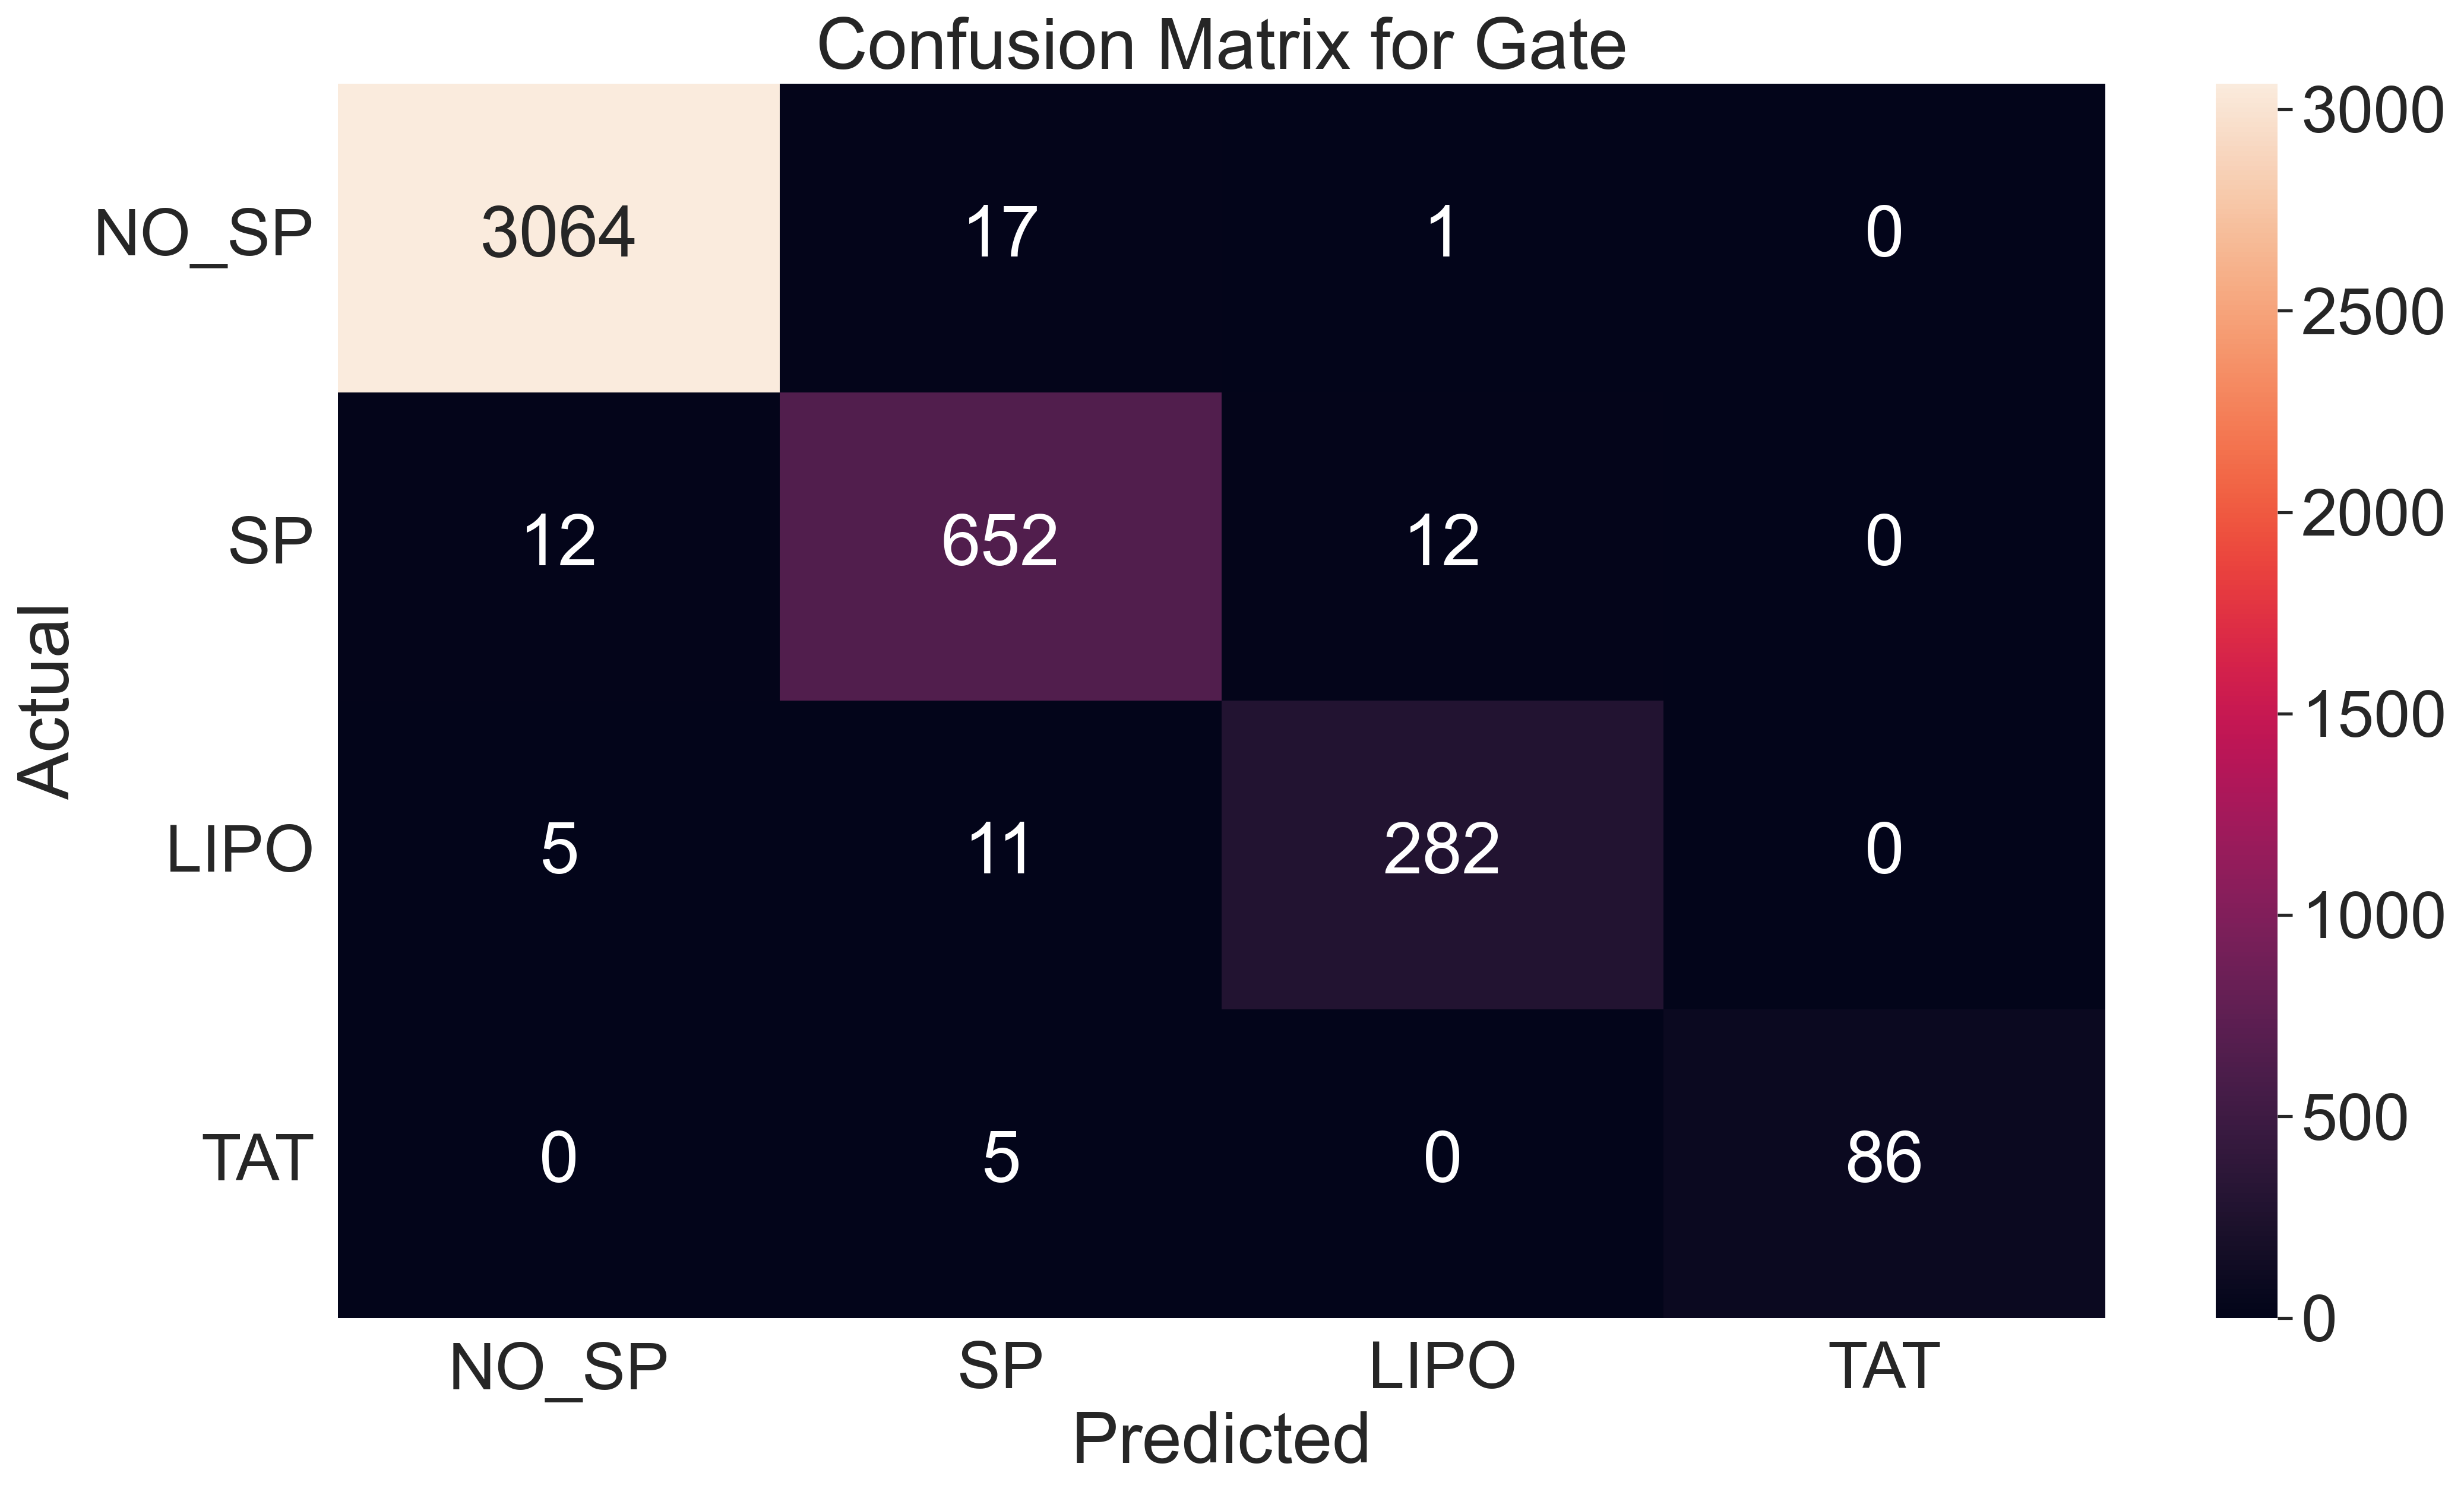

In [355]:
sample_metric = "TPR"
B = 10
samples = np.empty(B)

for x in range(B):
    sample = results.sample(5)[['Type', 'predicted_type']]
    targets = sample['Type']
    predictions = sample['predicted_type']
    
    sample_metrics_gate = src.evaluation.evaluate(
        targets=targets,
        predictions=predictions,
        labels=gate_labels
    )
    
    print(targets.tolist())
    print(predictions.tolist())
    print(sample_metrics_gate[sample_metric])
    
    samples[x] = np.nanmean(sample_metrics_gate[sample_metric])
display(np.sqrt(1/(B-1)*np.sum(samples-samples.mean()**2)))
src.evaluation.plot_confusion_matrix(metrics_gate['CM'], gate_labels, title="Confusion Matrix for Gate")

---

In [ ]:
# sample = results.sample(5)[['Type', 'predicted_type']]
sample = results[['Type', 'predicted_type']]
targets = sample['Type']
predictions = sample['predicted_type']

In [ ]:
# display(targets)
# display(predictions)

In [ ]:
sample_metrics_gate = src.evaluation.evaluate(
        targets=targets,
        predictions=predictions,
        labels=gate_labels
    )
display(gate_labels)
display(sample_metrics_gate)

In [ ]:
src.evaluation.plot_confusion_matrix(sample_metrics_gate['CM'], gate_labels, title="Confusion Matrix for Gate")